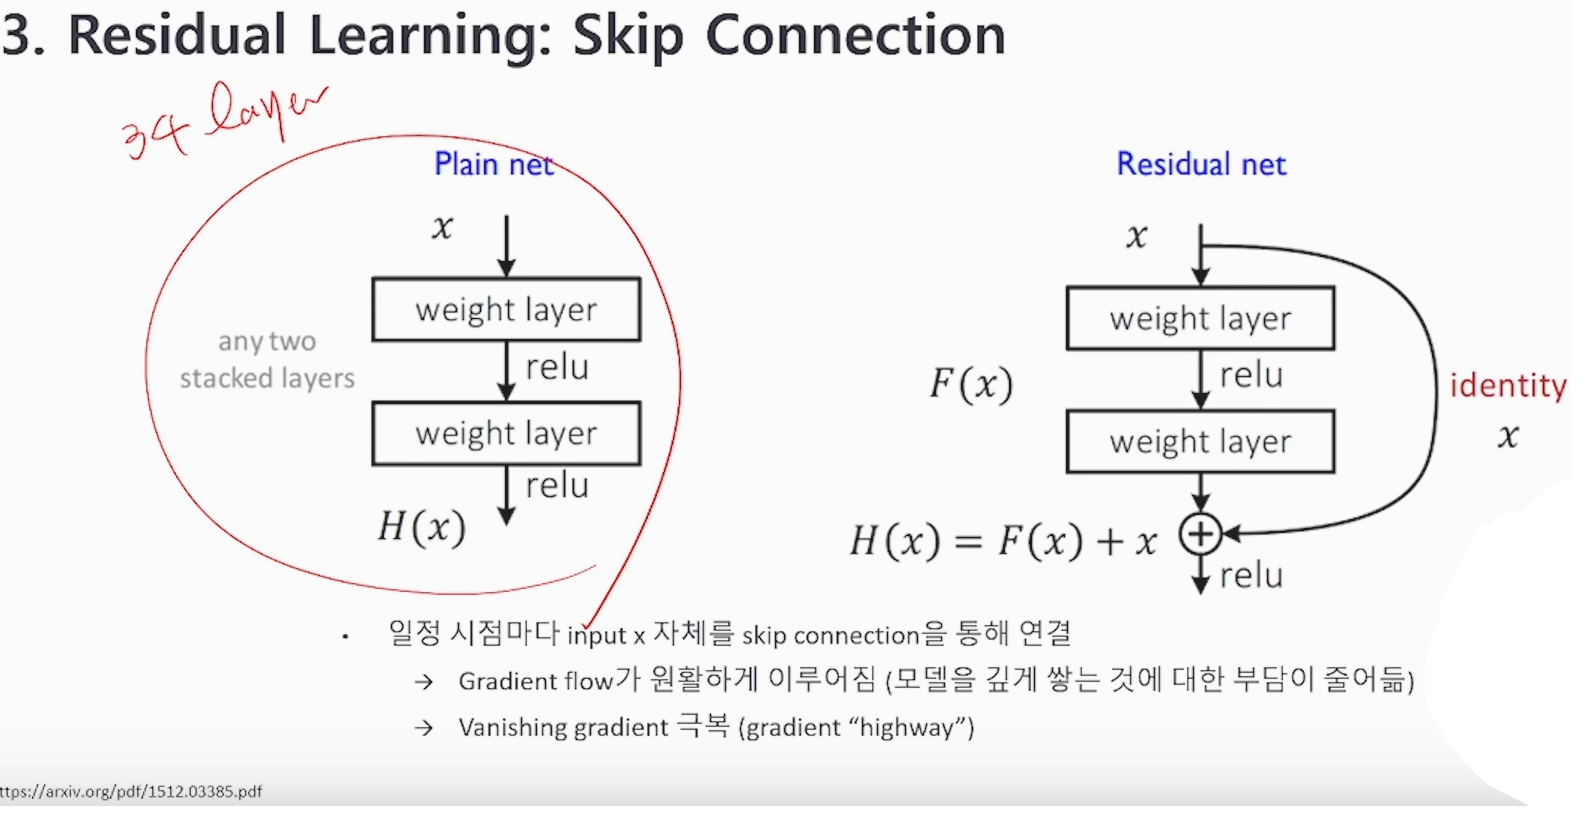

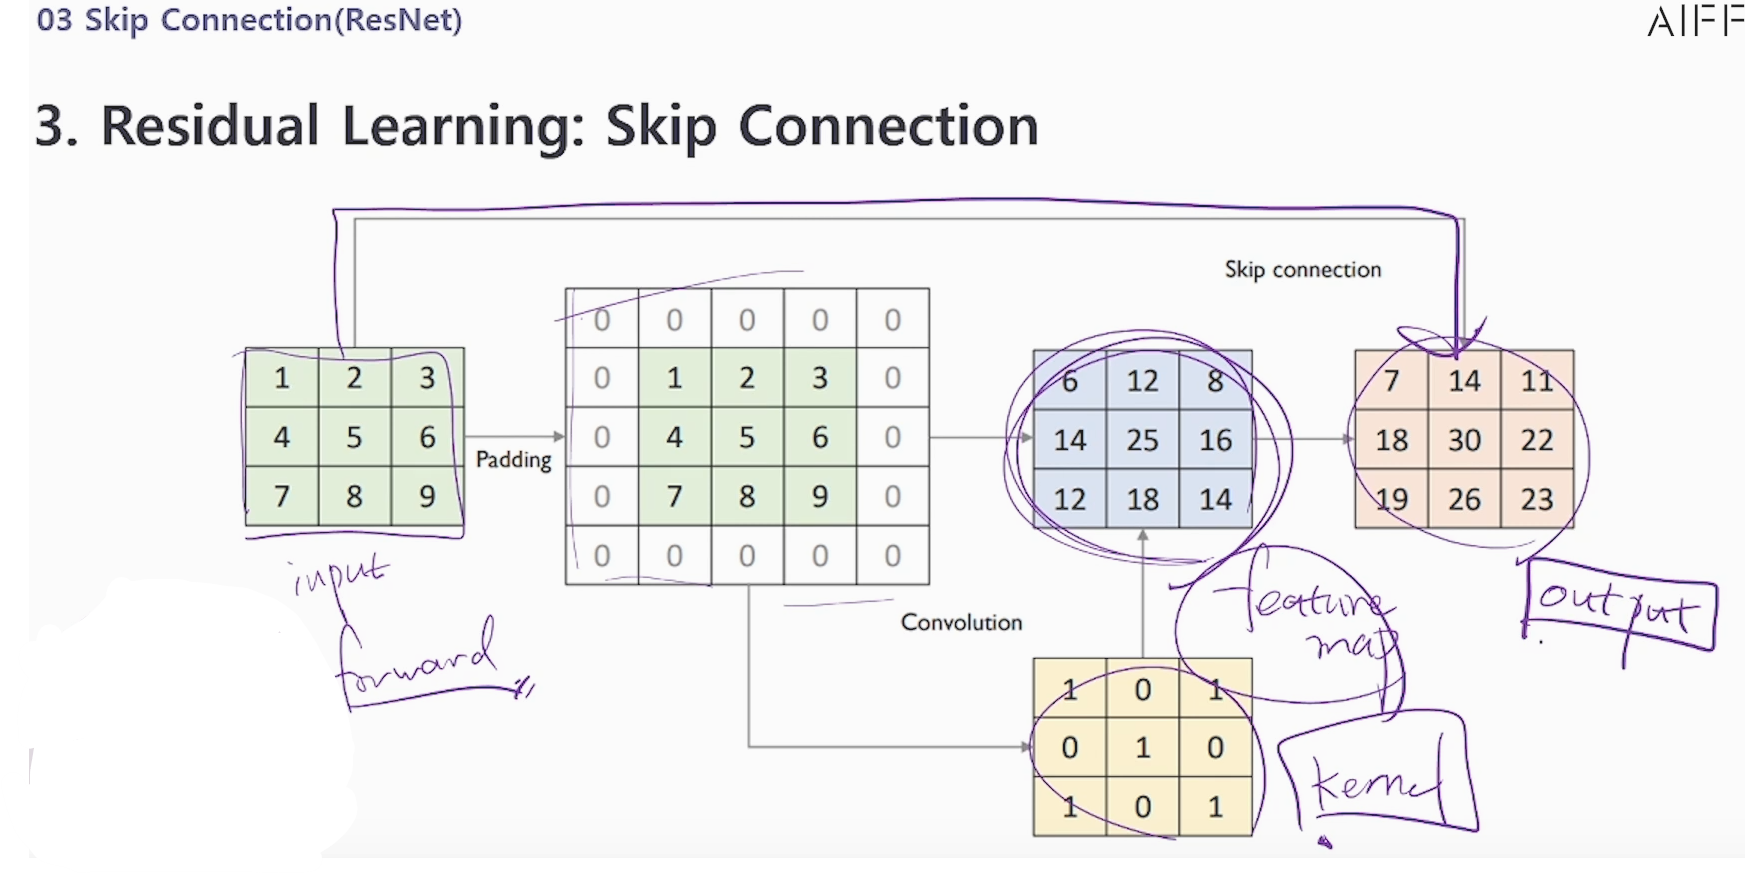

In [ ]:
# 모델을 만드는데 필요한 모듈 가져오기.
import tensorflow as tf
import tensorflow.keras as keras

# 모델 시각화 모듈
from tensorflow.keras.utils import plot_model

In [ ]:
# skip connection이 구현된 함수 residual_module을 정의

# resudual_module을 정의할 때 주의사항.
# skip connection을 구성하기 위해서 connection을 통해 합해지는
# feature map들의 가로x세로x채널 사이즈가 맞아야 한다.

def residual_module(input_layer, n_filters) :
    merge_input = input_layer

    # if문에서는 채널 사이즈가 동일한지 확인하고, 동일하지 않다면 1x1 convolution을 통해 채널 사이즈를 맞춰 준다.
    if input_layer.shape[-1] != n_filters :
        merge_input = keras.layers.Conv2D(n_filters,
                                          (1, 1),
                                          padding = 'same',
                                          activation = 'relu')(input_layer)  # n_filters로 채널 사이즈를 맞춰 준다.

    # Conv2D layer
    conv1 = keras.layers.Conv2D(n_filters,
                                (3, 3),
                                padding = 'same',
                                activation = 'relu')(input_layer)

    # Conv2D layer
    conv2 = keras.layers.Conv2D(n_filters,
                                (3, 3),
                                padding = 'same',
                                activation = 'linear')(conv1)

    # Add를 통해서 skip connection을 구현하는 부분
    out_layer = keras.layers.Add()([conv2, merge_input])
    out_layer = keras.layers.Activation('relu')(out_layer)

    return out_layer

In [ ]:
# input layer를 정의하고 residual module을 생성

input = keras.layers.Input(shape = (256, 256, 3))
residual_out = residual_module(input, 64)

In [ ]:
print(residual_out)

<KerasTensor shape=(None, 256, 256, 64), dtype=float32, sparse=False, name=keras_tensor_12>


In [ ]:
# input layer와 residual modul을 연결해서 모델 만들기

model = keras.models.Model(inputs=input, outputs = residual_out)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 256, 256, 64)   │          1,792 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 256, 256, 64)   │            256 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 256, 256, 64)   │              0 │ conv2d_5[0][0],        │
│                           │                        │                │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 256, 256, 64)   │              0 │ add_1[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 38,976 (152.25 KB)

 Trainable params: 38,976 (152.25 KB)

 Non-trainable params: 0 (0.00 B)

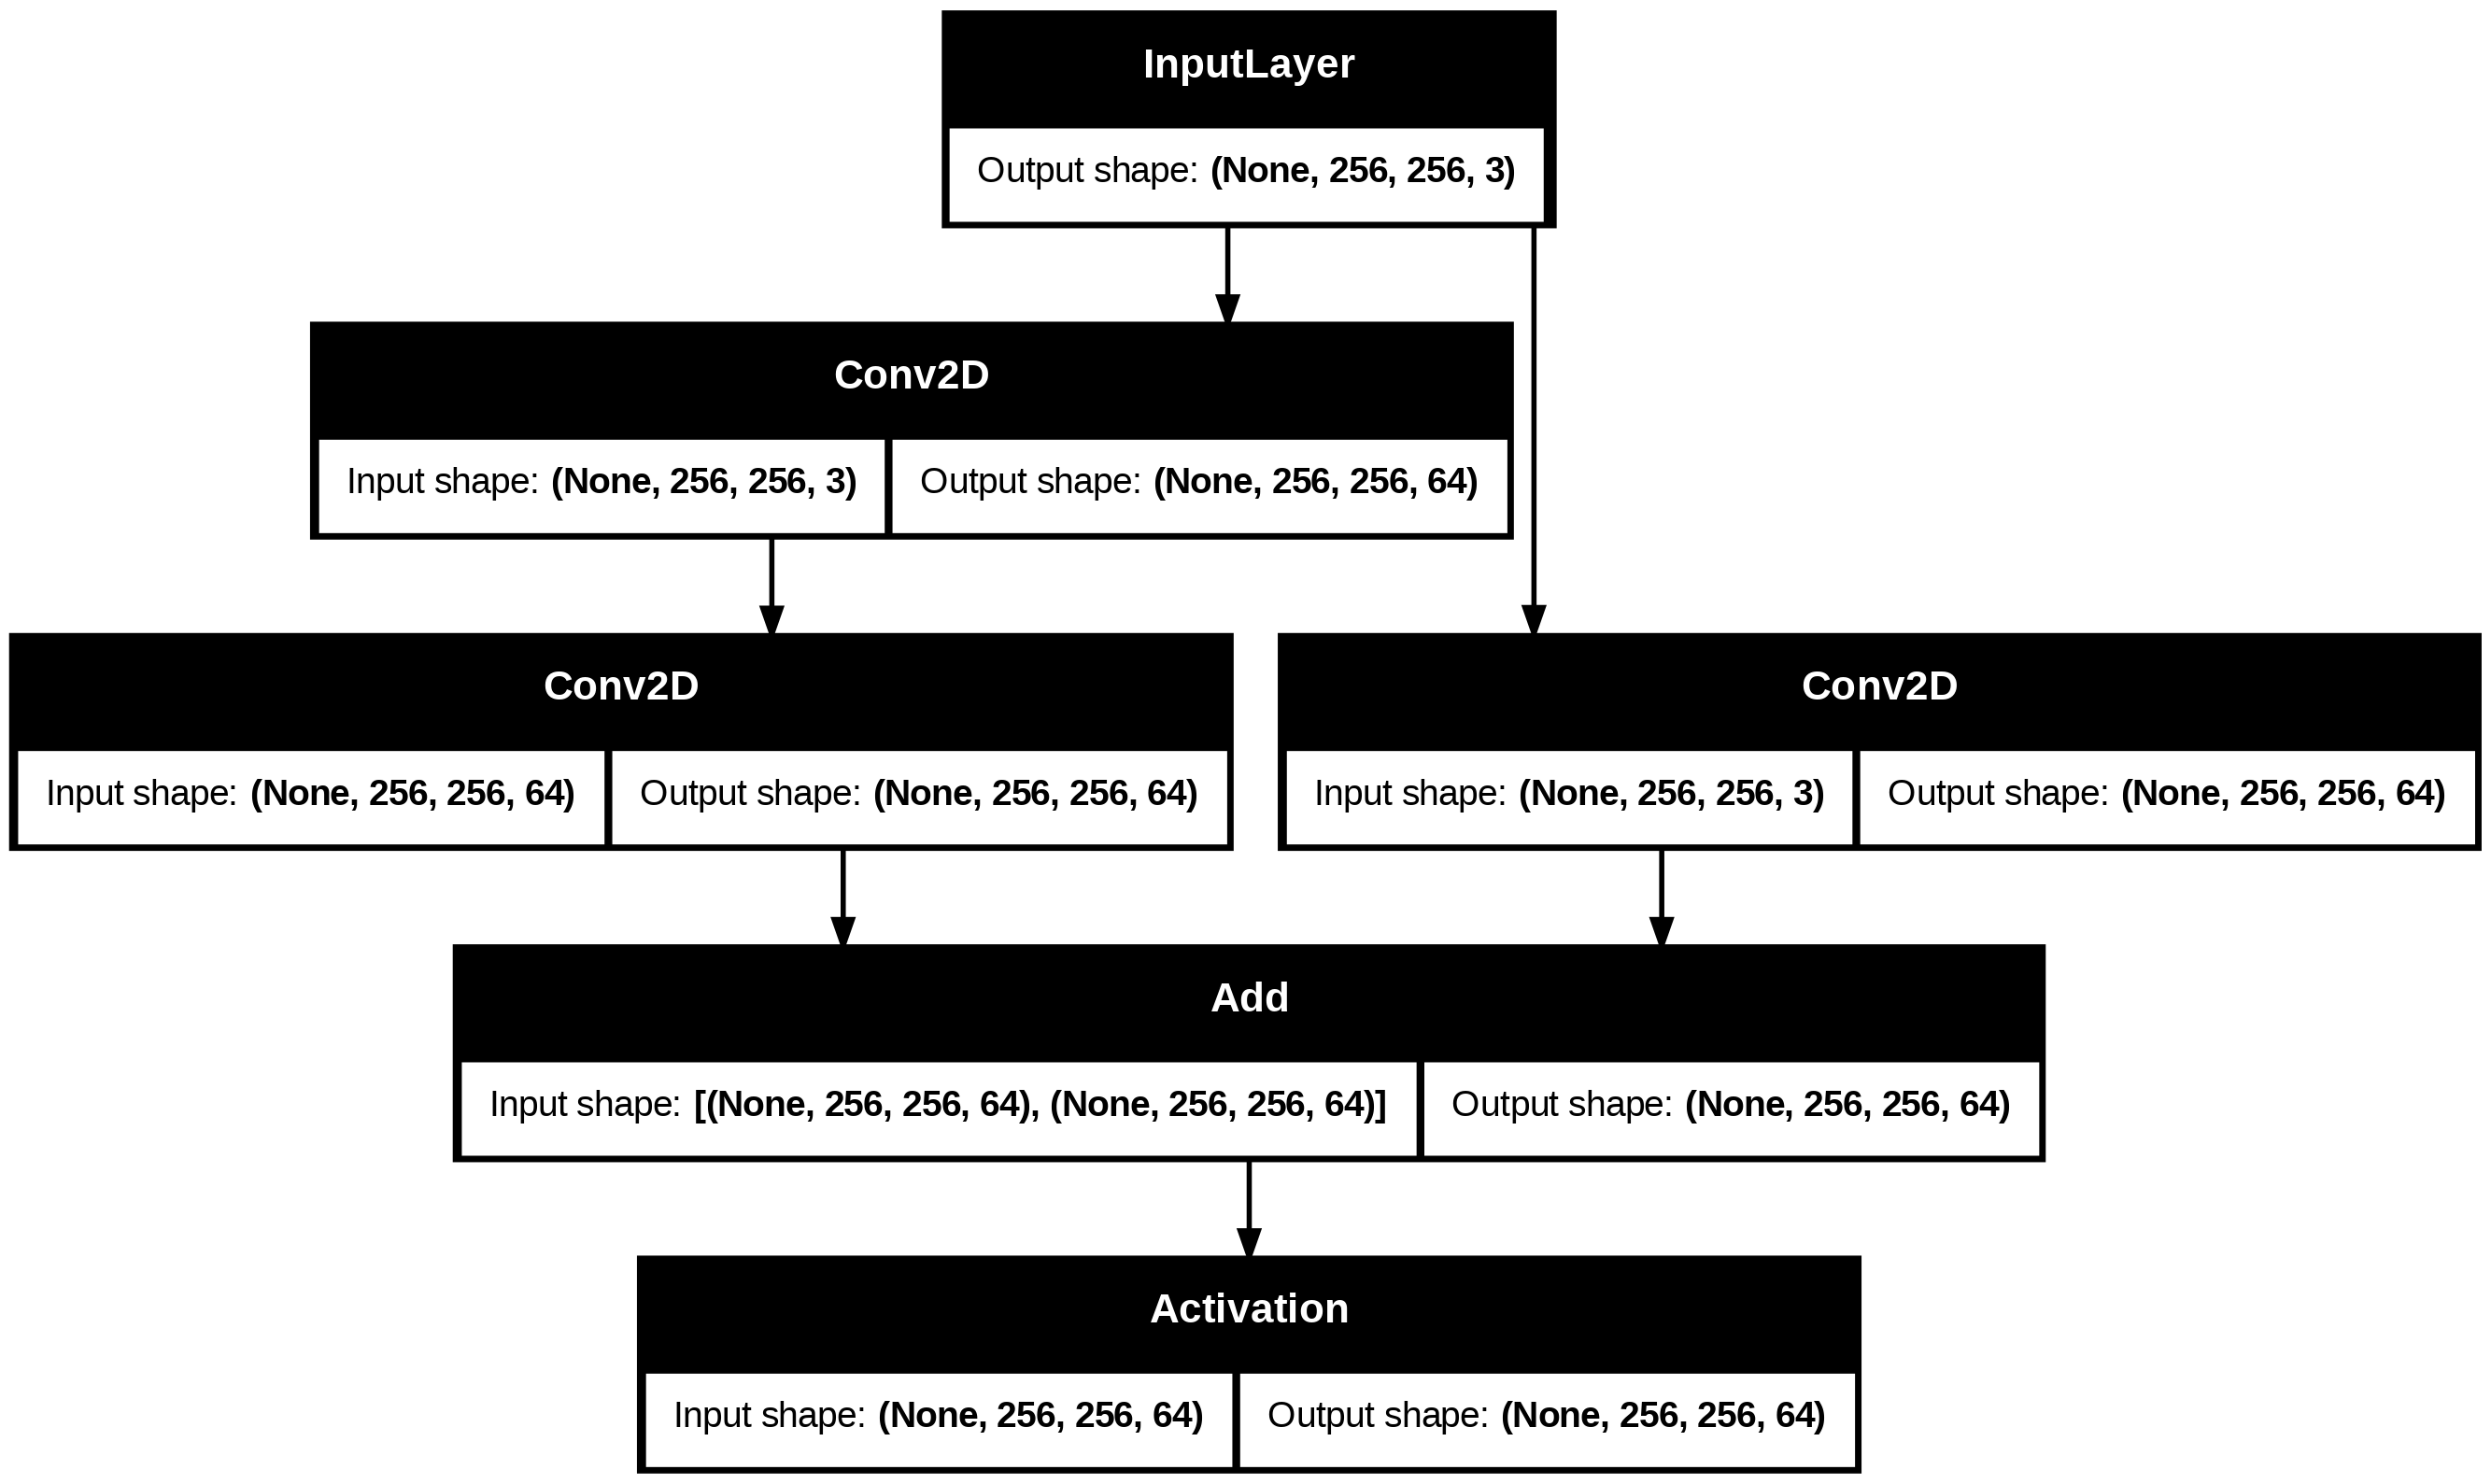

In [ ]:
# plot_model함수로 모델구조 시각화.
plot_model(model,
           show_shapes = True,
           to_file = 'residual_module.png')